In [8]:
# Load and review the content of the first notebook to understand its structure and data
import nbformat

file_path = '/Users/zhaolongjiang/Desktop/UK Python/Ipsos-UK News.ipynb'

# Read the notebook
with open(file_path, 'r', encoding='utf-8') as nb_file:
    nb_content = nbformat.read(nb_file, as_version=4)

# Display the structure of the notebook
nb_content.cells[:5]  # Display the first few cells to understand the structure


[{'cell_type': 'code',
  'execution_count': 1,
  'id': 'ae34bac9',
  'metadata': {},
  'outputs': [{'name': 'stdout',
    'output_type': 'stream',
    'text': 'Requirement already satisfied: nltk in ./anaconda3/lib/python3.11/site-packages (3.8.1)\nRequirement already satisfied: gensim in ./anaconda3/lib/python3.11/site-packages (4.3.0)\nCollecting textblob\n  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata\n  Downloading textblob-0.18.0.post0-py3-none-any.whl.metadata (4.5 kB)\nRequirement already satisfied: click in ./anaconda3/lib/python3.11/site-packages (from nltk) (8.0.4)\nRequirement already satisfied: joblib in ./anaconda3/lib/python3.11/site-packages (from nltk) (1.2.0)\nRequirement already satisfied: regex>=2021.8.3 in ./anaconda3/lib/python3.11/site-packages (from nltk) (2022.7.9)\nRequirement already satisfied: tqdm in

In [9]:
# Define a function to extract sentiment analysis results from a notebook
def extract_sentiment_from_nb(nb_cells):
    sentiment_data = {
        "polarity": None,
        "subjectivity": None
    }
    for cell in nb_cells:
        if cell.cell_type == 'code':
            for output in cell.get('outputs', []):
                if output.output_type == 'stream' and 'Polarity' in output.text:
                    lines = output.text.split('\n')
                    for line in lines:
                        if 'Polarity' in line:
                            parts = line.split(',')
                            polarity_part = parts[0].strip()
                            subjectivity_part = parts[1].strip()
                            
                            # Extract numerical values
                            polarity = float(polarity_part.split(':')[1].strip())
                            subjectivity = float(subjectivity_part.split(':')[1].strip())
                            
                            sentiment_data["polarity"] = polarity
                            sentiment_data["subjectivity"] = subjectivity
                            return sentiment_data
    return sentiment_data

# Extract sentiment analysis result from the first notebook
sentiment_data_1 = extract_sentiment_from_nb(nb_content.cells)
sentiment_data_1


{'polarity': 0.10508609908609907, 'subjectivity': 0.38971572871572907}

In [15]:
# Define a function to read a notebook and extract sentiment analysis results
def read_and_extract_sentiment(file_path):
    with open(file_path, 'r', encoding='utf-8') as nb_file:
        nb_content = nbformat.read(nb_file, as_version=4)
    return extract_sentiment_from_nb(nb_content.cells)

# File paths for the remaining notebooks
file_paths = [
    '/Users/zhaolongjiang/Desktop/UK Python/TaylorWessing-UK News.ipynb',
    '/Users/zhaolongjiang/Desktop/UK Python/Government-UK News1.ipynb',
    '/Users/zhaolongjiang/Desktop/UK Python/Government-UK News2.ipynb',
    '/Users/zhaolongjiang/Desktop/UK Python/BBC-UK News.ipynb',
    '/Users/zhaolongjiang/Desktop/UK Python/MSN-UK News.ipynb',
    '/Users/zhaolongjiang/Desktop/UK Python/Yahoo-UK News.ipynb',
    '/Users/zhaolongjiang/Desktop/UK Python/Reuters-UK News1.ipynb',
    '/Users/zhaolongjiang/Desktop/UK Python/Reuters-UK News2.ipynb'
    
]

# Extract sentiment data from all notebooks
sentiment_data_all = [sentiment_data_1] + [read_and_extract_sentiment(fp) for fp in file_paths]

sentiment_data_all


[{'polarity': 0.10508609908609907, 'subjectivity': 0.38971572871572907},
 {'polarity': 0.21766338500209473, 'subjectivity': 0.4735156868221385},
 {'polarity': 0.10740269110398978, 'subjectivity': 0.3555281010475816},
 {'polarity': 0.16021227310700997, 'subjectivity': 0.33828123338649657},
 {'polarity': 0.11661142676767676, 'subjectivity': 0.3260732323232323},
 {'polarity': 0.14407005116096022, 'subjectivity': 0.44984966548602906},
 {'polarity': -0.025958964646464643, 'subjectivity': 0.3983358585858586},
 {'polarity': 0.08735827664399091, 'subjectivity': 0.2890362811791383},
 {'polarity': 0.0955053391053391, 'subjectivity': 0.4029881673881674}]

In [11]:
# Calculate the average polarity and subjectivity across all notebooks
average_polarity = sum([data['polarity'] for data in sentiment_data_all]) / len(sentiment_data_all)
average_subjectivity = sum([data['subjectivity'] for data in sentiment_data_all]) / len(sentiment_data_all)

average_polarity, average_subjectivity


(0.11199450859229954, 0.38036932832604126)

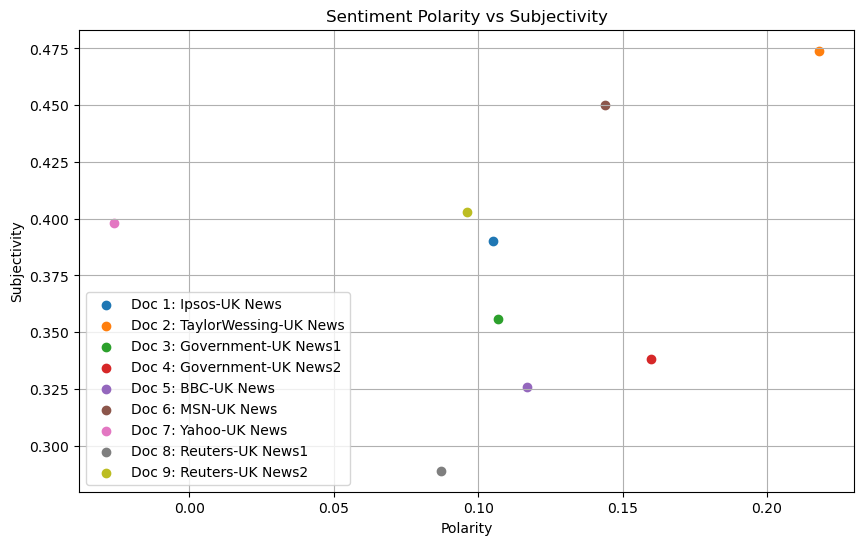

In [16]:
import matplotlib.pyplot as plt

# Data preparation
polarities = [0.105, 0.218, 0.107, 0.160, 0.117, 0.144, -0.026, 0.087, 0.096]
subjectivities = [0.390, 0.474, 0.356, 0.338, 0.326, 0.450, 0.398, 0.289, 0.403]
documents = ['Doc 1: Ipsos-UK News', 'Doc 2: TaylorWessing-UK News', 'Doc 3: Government-UK News1', 
             'Doc 4: Government-UK News2', 'Doc 5: BBC-UK News', 
             'Doc 6: MSN-UK News', 'Doc 7: Yahoo-UK News',
             'Doc 8: Reuters-UK News1', 'Doc 9: Reuters-UK News2']

# Creating the scatter plot for sentiment polarity and subjectivity
plt.figure(figsize=(10, 6))
for i in range(len(polarities)):
    plt.scatter(polarities[i], subjectivities[i], label=documents[i])

plt.title('Sentiment Polarity vs Subjectivity')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.legend()
plt.grid(True)
plt.show()


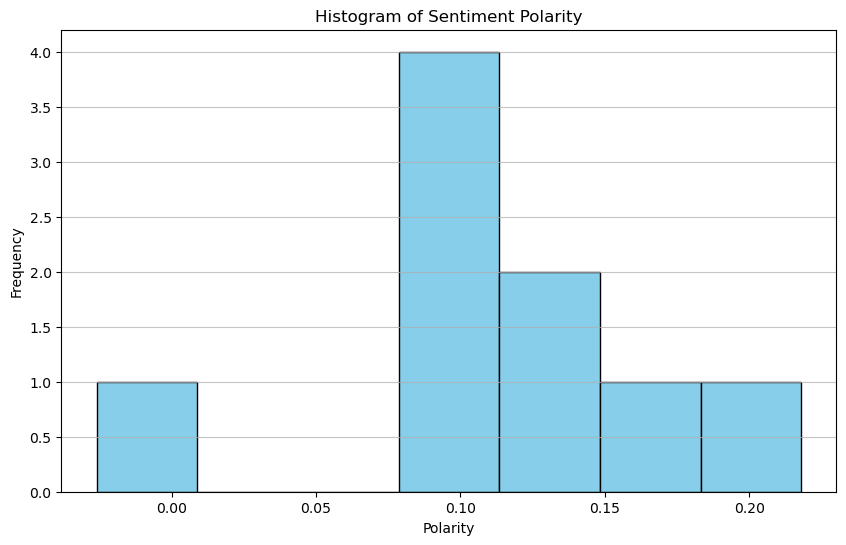

In [17]:
import matplotlib.pyplot as plt

# Data preparation
polarities = [0.105, 0.218, 0.107, 0.160, 0.117, 0.144, -0.026, 0.087, 0.096]

# Creating the histogram for sentiment polarity
plt.figure(figsize=(10, 6))
plt.hist(polarities, bins=7, color='skyblue', edgecolor='black')

plt.title('Histogram of Sentiment Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


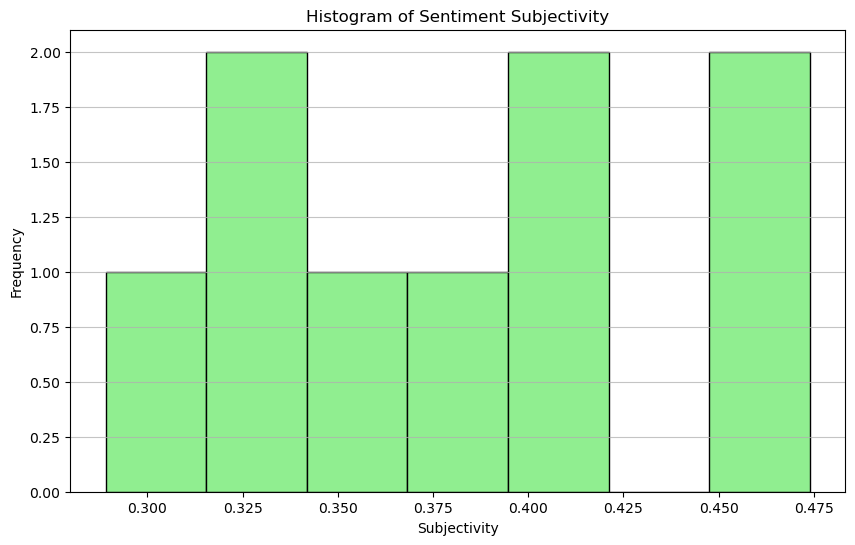

In [18]:
import matplotlib.pyplot as plt

# Data preparation
subjectivities = [0.390, 0.474, 0.356, 0.338, 0.326, 0.450, 0.398, 0.289, 0.403]

# Creating the histogram for sentiment subjectivity
plt.figure(figsize=(10, 6))
plt.hist(subjectivities, bins=7, color='lightgreen', edgecolor='black')

plt.title('Histogram of Sentiment Subjectivity')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


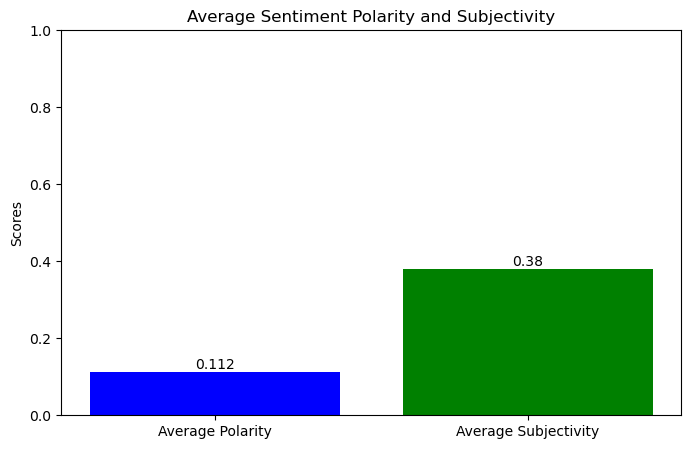

In [19]:
import matplotlib.pyplot as plt

# Pre-calculated average polarity and subjectivity
average_polarity = 0.112
average_subjectivity = 0.380

# Data for plotting
labels = ['Average Polarity', 'Average Subjectivity']
values = [average_polarity, average_subjectivity]

# Creating the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['blue', 'green'])

# Adding value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 3), ha='center', va='bottom')

plt.title('Average Sentiment Polarity and Subjectivity')
plt.ylabel('Scores')
plt.ylim(0, 1) # Assuming subjectivity is the highest value and it can't be more than 1
plt.show()


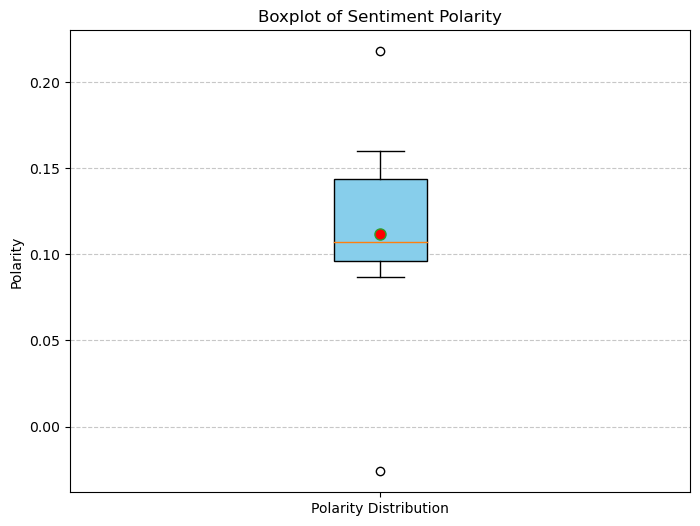

In [20]:
import matplotlib.pyplot as plt

# Pre-defined sentiment polarities
polarities = [0.105, 0.218, 0.107, 0.160, 0.117, 0.144, -0.026, 0.087, 0.096]

# Creating the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(polarities, vert=True, patch_artist=True, showmeans=True, 
            boxprops=dict(facecolor='skyblue'), 
            meanprops=dict(marker='o', markerfacecolor='red', markersize=8))

plt.title('Boxplot of Sentiment Polarity')
plt.ylabel('Polarity')
plt.xticks([1], ['Polarity Distribution'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


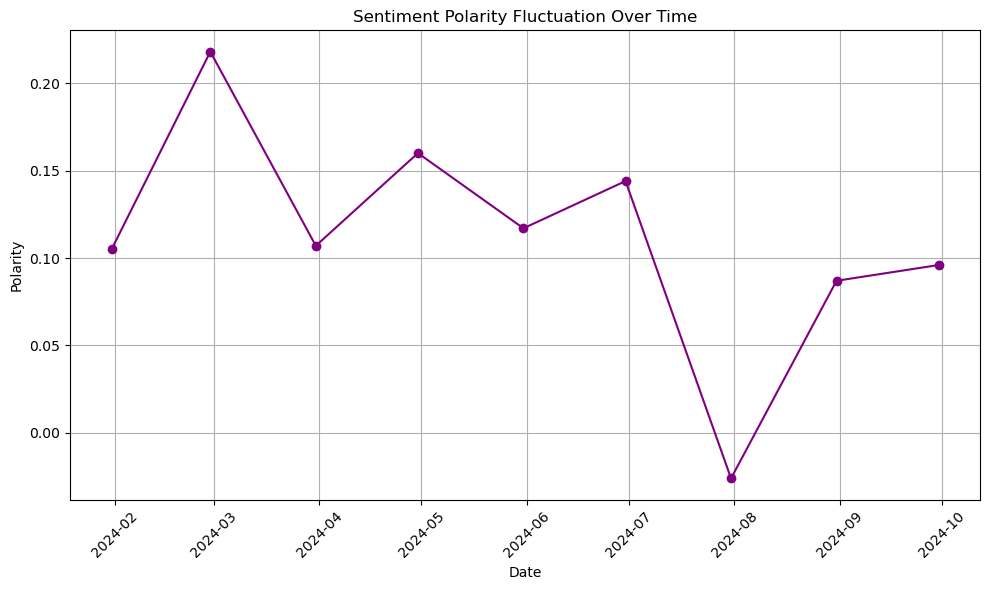

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Simulated dates for each document. In a real scenario, these would be the actual dates associated with each document.
dates = pd.date_range(start="2024-01-01", periods=len(polarities), freq='M')

# Creating a DataFrame for easier plotting
data = pd.DataFrame({'Date': dates, 'Polarity': polarities})

# Creating the line plot
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Polarity'], marker='o', linestyle='-', color='purple')

plt.title('Sentiment Polarity Fluctuation Over Time')
plt.xlabel('Date')
plt.ylabel('Polarity')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated date labels
plt.show()


In [4]:
import os
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
import re

# 加载数据
file_paths = [
    '/Users/zhaolongjiang/Desktop/UK txt/Ipsos-UK News.txt',
    '/Users/zhaolongjiang/Desktop/UK txt/Government-UK News1.txt',
    '/Users/zhaolongjiang/Desktop/UK txt/Government-UK News2.txt',
    '/Users/zhaolongjiang/Desktop/UK txt/BBC-UK News.txt',
    '/Users/zhaolongjiang/Desktop/UK txt/MSN-UK News.txt',
    '/Users/zhaolongjiang/Desktop/UK txt/Yahoo-UK News.txt',
    '/Users/zhaolongjiang/Desktop/UK txt/TaylorWessing-UK News.txt',
    '/Users/zhaolongjiang/Desktop/UK txt/Reuters-UK News1.txt',
    '/Users/zhaolongjiang/Desktop/UK txt/Reuters-UK News2.txt',
    # 添加所有文本文件的路径
]
documents = []
for file_path in file_paths:
    with open(file_path, 'r', encoding='utf-8') as file:
        documents.append(file.read())

# 预处理文本
def preprocess(document):
    document = document.lower()
    document = re.sub(r'\W', ' ', document)
    document = re.sub(r'\s+', ' ', document)
    words = document.split()
    words = [word for word in words if word not in stopwords.words('english')]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

processed_docs = [preprocess(doc) for doc in documents]

# 文本向量化
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(processed_docs)

# LDA主题建模
lda = LatentDirichletAllocation(n_components=10, random_state=0)
lda.fit(doc_term_matrix)

# 结果评估和解释
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}: {}".format(topic_idx, " ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]])))

display_topics(lda, vectorizer.get_feature_names_out(), 10)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhaolongjiang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic 0: deter far concern prevent tell aim hit 2021 600 record
Topic 1: deter far concern prevent tell aim hit 2021 600 record
Topic 2: worker salari skill chang threshold minimum 2024 visa april home
Topic 3: care worker migrat work visa depend govern bring peopl new
Topic 4: deter far concern prevent tell aim hit 2021 600 record
Topic 5: deter far concern prevent tell aim hit 2021 600 record
Topic 6: deter far concern prevent tell aim hit 2021 600 record
Topic 7: support public number conserv labour say peopl govern rwanda migrat
Topic 8: deter far concern prevent tell aim hit 2021 600 record
Topic 9: deter far concern prevent tell aim hit 2021 600 record


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhaolongjiang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


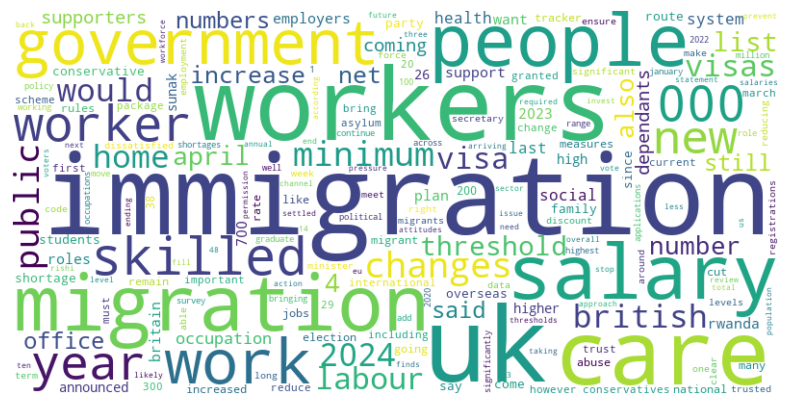

[('immigration', 64),
 ('uk', 56),
 ('workers', 52),
 ('care', 41),
 ('migration', 39),
 ('salary', 39),
 ('people', 38),
 ('government', 34),
 ('work', 34),
 ('skilled', 33)]

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# 定义文件路径
file_paths = [
    '/Users/zhaolongjiang/Desktop/UK txt/Ipsos-UK News.txt',
    '/Users/zhaolongjiang/Desktop/UK txt/Government-UK News1.txt',
    '/Users/zhaolongjiang/Desktop/UK txt/Government-UK News2.txt',
    '/Users/zhaolongjiang/Desktop/UK txt/BBC-UK News.txt',
    '/Users/zhaolongjiang/Desktop/UK txt/MSN-UK News.txt',
    '/Users/zhaolongjiang/Desktop/UK txt/Yahoo-UK News.txt',
    '/Users/zhaolongjiang/Desktop/UK txt/TaylorWessing-UK News.txt',
    '/Users/zhaolongjiang/Desktop/UK txt/Reuters-UK News1.txt',
    '/Users/zhaolongjiang/Desktop/UK txt/Reuters-UK News2.txt',
    # 添加所有文本文件的路径
]

# 初始化一个空字符串用于存放所有文本内容
all_text = ""

# 读取并合并文本
for file_path in file_paths:
    with open(file_path, 'r', encoding='utf-8') as file:
        all_text += file.read() + " "

# 预处理文本：转小写，移除标点，去除停用词
def preprocess(text):
    text = text.lower()  # 转小写
    text = re.sub(r'\W', ' ', text)  # 移除标点
    text = re.sub(r'\s+', ' ', text)  # 移除多余的空格
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]
    return words

processed_words = preprocess(all_text)

# 计算词汇频率
word_freq = Counter(processed_words)

# 生成词云图
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(word_freq)

# 展示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 展示词汇频率排名
word_freq.most_common(10)
